#### Assignment No: 09

**Data Analytics II** <br/>
1. Implement logistic regression using Python/R to perform classification on Social_Network_Ads.csv dataset.<br/>
2. Compute Confusion matrix to find TP, FP, TN, FN, Accuracy, Error rate, Precision, Recall on the given dataset

In [47]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


**1. About the dataset**
This dataset contains information about users including their UserID, Gender, Age, EstimatedSalary, and whether they Purchased a product. Here's a description of each column:
- User ID: A unique identifier for each user.
- Gender: The gender of the user (e.g., Male or Female).
- Age: The age of the user in years.
- Estimated Salary: The estimated salary of the user in a particular currency.
- Purchased: A binary variable indicating whether the user purchased a product (0 for not purchased, 1 for purchased).

In [48]:
data = pd.read_csv("data_social_network_ads.csv")
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [7]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


**2. Exploratory Data Analysis**

In [8]:
data.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [49]:
# check if there is null values
data.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [12]:
data['Gender'].replace(['Male','Female'],[0,1], inplace=True)

In [14]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,0,19,19000,0
1,15810944,0,35,20000,0
2,15668575,1,26,43000,0
3,15603246,1,27,57000,0
4,15804002,0,19,76000,0


<Axes: xlabel='Gender', ylabel='count'>

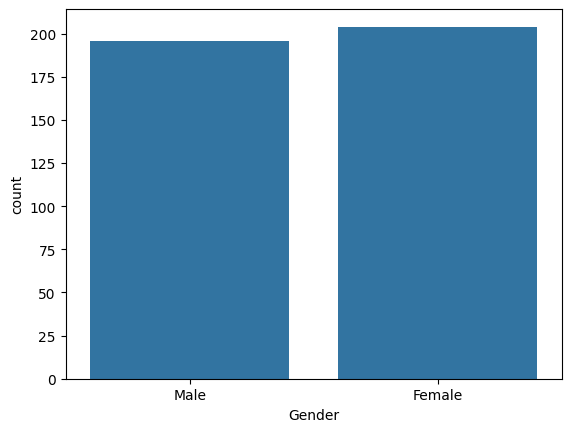

In [52]:
sns.countplot(x=data['Gender'])

<Axes: xlabel='Purchased', ylabel='count'>

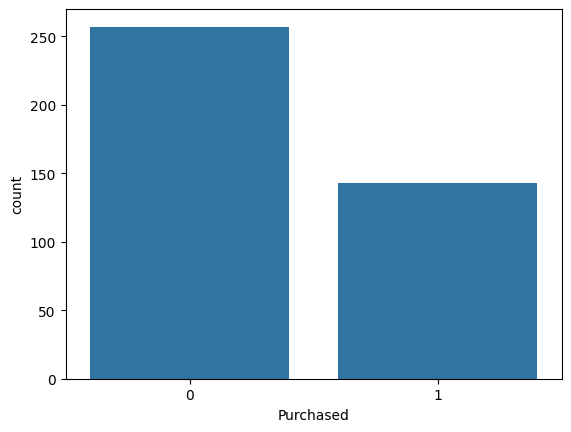

In [54]:
sns.countplot(data=data, x=data['Purchased'])

**3. Model Building**


In [34]:
from sklearn.model_selection import train_test_split

X = data[['Gender','Age','EstimatedSalary']] 
Y = data['Purchased']
    
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

In [35]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train, Y_train)


LogisticRegression()

In [39]:
Y_pred = lr.predict(X_test)
TP,FN,FP,TN = confusion_matrix(Y_test, Y_pred).ravel()


In [40]:
print(classification_report(y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.83      0.97      0.89        73
           1       0.94      0.68      0.79        47

    accuracy                           0.86       120
   macro avg       0.88      0.83      0.84       120
weighted avg       0.87      0.86      0.85       120



In [44]:
# Accuracy
accuracy = (TP+TN)/(TP+TN+FP+FN)
error_rate = 1- accuracy

print("Accuracy: ",accuracy)
print("Error Rate: ", error_rate)

Accuracy:  0.8583333333333333
Error Rate:  0.14166666666666672


In [55]:
# Precision
precision = TP/(TP+FP)
recall = TP/(TP+FN)
f1 = ( 2 * recall * precision ) / ( precision + recall )
print("Precision: ", precision)
print("Recall: ", recall)
print("F1: ", f1)


Precision:  0.8255813953488372
Recall:  0.9726027397260274
F1:  0.8930817610062893
